# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __The Gamma-Poisson Bayesian Conjugate Model__ <br>

Author:  Tyler J. Brough <br>
Updated: April 11, 2022 <br>

---

<br>
<br>

These notes are based on the following: https://statswithr.github.io/book/bayesian-inference.html#the-gamma-poisson-conjugate-families


---

<br>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
## set the prng seed value
np.random.seed(123456789)

## __Introduction__

<br>

In this note we will take a look at how to implement the Gamma-Poisson conjugate Bayesian model.

<br>

In this model the likelihood function takes the form of the Poisson distribution: 

<br>

$$
{\Large f(x; \lambda)=\frac{\lambda^x e^{-\lambda}}{x!}}
$$

<br>

<br>

And the prior takes the form of the Gamma distribution:

<br>

$$
{\Large p(\lambda) = \lambda^{k-1}\frac{e^{-\lambda/\theta}}{\theta^k\Gamma(k)}}
$$

<br>

<br>

* Because we know this is a conjugate model a priori we know that the posterior will take the same form as the prior. 

* The prior is $\lambda \sim Gamma(k, \theta)$ with prior hyperparameters $k$ and $\theta$

* The posterior will then be $\lambda | x \sim Gamma(k^{\ast}, \theta^{\ast})$ with posterior hyperparameters $k^{\ast} = k + \sum x_{i}$ and $\theta^{\ast} = \frac{\theta}{n\theta + 1}$

* The updating part of Bayes' Rule is embedded in these calculations, so there is nothing more we need to do. We just calculate these posterior hyperparameters directly and we're done. 

<br>

Let's see an example below: 

<br>

In [3]:
## We will start by simulating the "historical data" (in a real project this would be your sample data)

## Number of observations
n = 100

## Set the "true" lambda value
λ = 5.0 

## Draw n values from the Poisson distribution
x = np.random.poisson(lam=λ, size=n)

In [4]:
## Let's peak at the first 10 values
x[:10]

array([7, 6, 1, 6, 5, 8, 6, 6, 6, 5])

In [5]:
## Set the prior hyperparameters (diffuse/uniformative prior)
k = 1.0
θ = 2.0

In [6]:
## Plot the prior distribution

def plot_gamma(k, θ, upper = 40):
    #define x-axis values
    x = np.linspace (0, upper, 100) 

    #calculate pdf of Gamma distribution for each x-value
    y = stats.gamma.pdf(x, a=k, scale=θ)

    #create plot of Gamma distribution
    plt.plot(x, y, lw=2.0, color="purple")

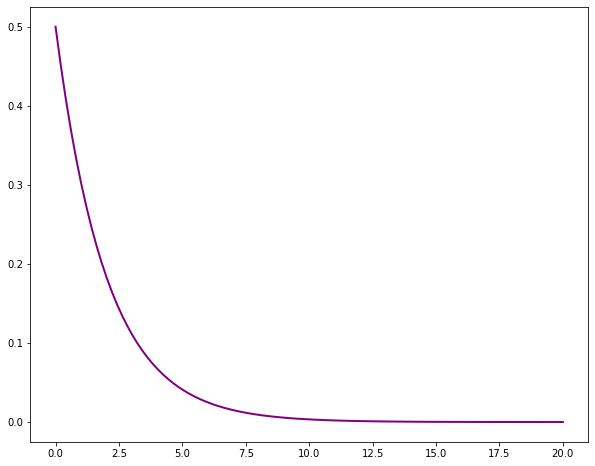

In [7]:
plot_gamma(k,θ, upper = 20)

In [8]:
## Now we can form the posterior 
k_star = k + np.sum(x)
θ_star = θ / (n * θ + 1)

k_star, θ_star

(501.0, 0.009950248756218905)

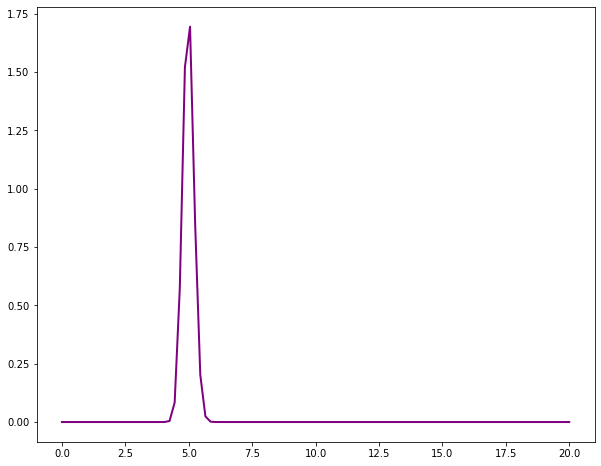

In [9]:
## Plot the updated Gamma posterior
plot_gamma(k_star, θ_star, upper=20)

In [10]:
## Let's take the mode (the mode gives us a convenient point estimate to compare to the MLE)
(k_star - 1.0) * θ_star

4.975124378109452

In [11]:
## We can also look at the posterior mean
k_star * θ_star

4.985074626865671

In [12]:
## Let's compare with the MLE
np.mean(x)

5.0

<br>

__We see that they are very similar!__

<br>

__NB:__ Try it again, but with a more informative prior, say $k = 5.0$ and $\theta = 1.0$